In [19]:
# Declarando as bibliotecas necessárias.
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

%matplotlib notebook

<IPython.core.display.Javascript object>


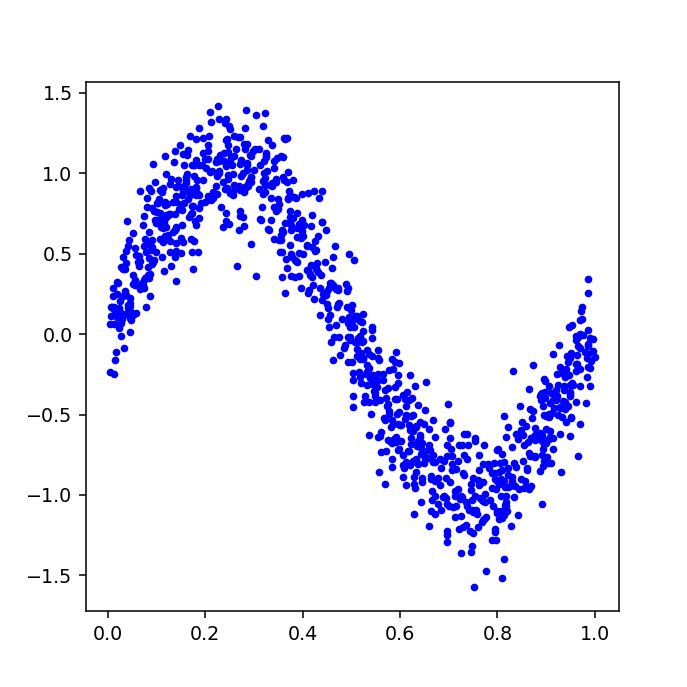

In [20]:
# Importando os arquivos do training.csv.

df = pd.read_csv('poly_reg_p.csv', header=None)
x = df[0].to_numpy()
y = df[1].to_numpy()
fig = plt.figure(figsize=(5,5))
plt.plot(x, y, 'b.') # Plotando o gráfico.

In [21]:
# Implementando o holdout.
starttime = timeit.default_timer()

# Dividindo os dados de teste e validação.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=10)

print('tamanho conjunto de treinamento:', len(y_train))
print('tamanho conjunto de validação:', len(y_val)) 

tamanho conjunto de treinamento: 700
tamanho conjunto de validação: 300


In [22]:
# Polinomial degrees to be tested.
degrees = [1, 2, 20]
include_bias = True

mean_vec = []
std_vec = []
for d in range(1,20) :
    # Instantiate a polynomial.
    poly_features = PolynomialFeatures(degree=d, include_bias=include_bias)
    # Instantiate a scaler.
    std_scaler = StandardScaler()
    # Instantiate a linear regressor.
    lin_reg = LinearRegression()
    


In [26]:
# Create a pipeline of actions.
    polynomial_regression = Pipeline([("poly_features", poly_features),("std_scaler", std_scaler),("lin_reg", lin_reg)])


    polynomial_regression.fit(x_train, y_train)
    
    y_val_predict = polynomial_regression.predict(x_val)
    
    mean_vec.append(np.sqrt(mean_squared_error(y_val, y_val_predict)))

print("Tempo de execução: %1.4f [s]" % (timeit.default_timer() - starttime

IndentationError: unexpected indent (<ipython-input-26-94115dd5ed0b>, line 2)

In [27]:
# Plot results.
plt.figure(figsize=(8, 5))
plt.plot(range(1, 13), mean_vec,  label='Erro quadrático médio')
plt.xlabel('Ordem do polinômio', fontsize=14)
plt.ylabel('Erro quadrático Médio', fontsize=14)
plt.xticks(range(0, 13, 2))
plt.xlim([1, 12])
plt.legend()
plt.grid()
# Save figure
plt.savefig("holdout.png", dpi=600)
#Show the plot.
plt.show()

<IPython.core.display.Javascript object>

ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)